#Avaliação dos algoritmos

* Naive Bayes: 93.80
* Árvores de Decisão: 98.20
* Random Forest: 98.40
* Regras: 97.40
* Knn: 98.60
* Regressão Logística: 94.60
* SVM: 98.80
* Redes Neurais: 99.60

##Tuning dos parâmetros com GridSearch

###Preparação dos Dados

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [ ]:
import pickle
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
with open('/content/drive/MyDrive/Dataset_pkl/credit.pkl','rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste=pickle.load(f)

In [ ]:
X_credit=np.concatenate([X_credit_treinamento,X_credit_teste],axis=0)
y_credit=np.concatenate([y_credit_treinamento,y_credit_teste],axis=0)

In [ ]:
X_credit.shape,y_credit.shape

((2000, 3), (2000,))

###Árvore de Decisão

In [ ]:
parametros={'criterion': ['gini','entropy'],
            'splitter': ['best','random'],
            'min_samples_split':[2,5,10],
            'min_samples_leaf':[1,5,10]}

In [ ]:
grid_search=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=parametros);

In [ ]:
grid_search.fit(X_credit,y_credit);

In [ ]:
 melhores_parametros=grid_search.best_params_
 melhor_resultado=grid_search.best_score_

In [ ]:
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
0.983


###Random Forest

In [ ]:
parametros={'criterion': ['gini','entropy'],          
            'n_estimators':[10,40,100,150],
            'min_samples_split':[2,5,10],
            'min_samples_leaf':[1,5,10]}

In [ ]:
grid_search=GridSearchCV(estimator=RandomForestClassifier(),param_grid=parametros)
grid_search.fit(X_credit,y_credit);

In [ ]:
 melhores_parametros=grid_search.best_params_
 melhor_resultado=grid_search.best_score_

In [ ]:
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 40}
0.9860000000000001


###Knn

In [ ]:
parametros={'p': [1,2],
            'n_neighbors': [3,5,10,20]}

In [ ]:
grid_search=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=parametros);

In [ ]:
grid_search.fit(X_credit,y_credit);

In [ ]:
 melhores_parametros=grid_search.best_params_
 melhor_resultado=grid_search.best_score_
 print(melhores_parametros)
 print(melhor_resultado)

{'n_neighbors': 20, 'p': 1}
0.9800000000000001


###Regressão Logística

In [ ]:
parametros={'tol': [0.0001,0.00001,0.000005],
            'C': [1.0,1.5,2.0],
            'solver':['liblinear','sag','saga']}

In [ ]:
grid_search=GridSearchCV(estimator=LogisticRegression(),param_grid=parametros);
grid_search.fit(X_credit,y_credit);

In [ ]:
melhores_parametros=grid_search.best_params_
melhor_resultado=grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.0, 'solver': 'liblinear', 'tol': 0.0001}
0.9484999999999999


###SVM

In [ ]:
parametros={'tol':[0.001,0.0001,0.00001],
            'C':[1.0,1.5,2.0],
            'kernel':['rbf','linear','poly','sigmoid']}

In [ ]:
grid_search=GridSearchCV(estimator=SVC(),param_grid=parametros);
grid_search.fit(X_credit,y_credit);

In [ ]:
melhores_parametros=grid_search.best_params_
melhor_resultado=grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.5, 'kernel': 'rbf', 'tol': 0.001}
0.9829999999999999


###Redes Neurais

In [ ]:
parametros={'activation':['relu','logistic','tanh'],
            'solver':['adam','sgd'],
            'batch_size':[10,56]}

In [ ]:
grid_search=GridSearchCV(estimator=MLPClassifier(),param_grid=parametros);
grid_search.fit(X_credit,y_credit);

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
melhores_parametros=grid_search.best_params_
melhor_resultado=grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'activation': 'relu', 'batch_size': 10, 'solver': 'adam'}
0.9970000000000001


##Validação Cruzada

In [ ]:
from sklearn.model_selection import  cross_val_score, KFold

In [ ]:
resultados_arvore =[]
resultados_random_forest=[]
resultados_knn=[]
resultados_logistica=[]
resultados_svm=[]
resultados_rede_neural=[]

for i in range(30):
  kfold=KFold(n_splits=10,shuffle=True,random_state=i)

  arvore=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=1,min_samples_split=5,splitter='best')
  scores=cross_val_score(arvore,X_credit,y_credit,cv=kfold)
  resultados_arvore.append(scores.mean())

  random_forest=RandomForestClassifier(criterion='entropy',min_samples_leaf=1,min_samples_split=5,n_estimators=10)
  scores=cross_val_score(random_forest,X_credit,y_credit,cv=kfold)
  resultados_random_forest.append(scores.mean())

  knn=KNeighborsClassifier()
  scores=cross_val_score(knn,X_credit,y_credit,cv=kfold)
  resultados_knn.append(scores.mean())

  logistica=LogisticRegression(C=1.0,solver='lbfgs',tol=0.0001)
  scores=cross_val_score(logistica,X_credit,y_credit,cv=kfold)
  resultados_logistica.append(scores.mean())

  svm=SVC(kernel='rbf',C=2.0)
  scores=cross_val_score(svm,X_credit,y_credit,cv=kfold)
  resultados_svm.append(scores.mean())

  rede_neural=MLPClassifier(activation='relu',batch_size=56,solver='adam')
  scores=cross_val_score(rede_neural,X_credit,y_credit,cv=kfold)
  resultados_rede_neural.append(scores.mean())
  

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
resultados=pd.DataFrame({'Arvore':resultados_arvore,
                         'Random_Forest':resultados_random_forest,
                         'KNN':resultados_knn,
                         'Logistica':resultados_logistica,
                         'SVM':resultados_svm,
                         'Rede Neural':resultados_rede_neural})

In [ ]:
(resultados.std() / resultados.mean())*100

Arvore           0.179760
Random_Forest    0.188966
KNN              0.156446
Logistica        0.072517
SVM              0.129977
Rede Neural      0.058144
dtype: float64

In [ ]:
resultados.to_csv('resultados_algoritmos.csv')

####Teste de Normalidade nos resultados

In [ ]:
alpha=0.05

In [ ]:
from scipy.stats import shapiro

In [ ]:
shapiro(resultados_arvore), shapiro(resultados_random_forest), shapiro(resultados_knn), shapiro(resultados_logistica), shapiro(resultados_svm), shapiro(resultados_rede_neural),

((0.9765201807022095, 0.7274303436279297),
 (0.9728817939758301, 0.6206457614898682),
 (0.9584026336669922, 0.28181564807891846),
 (0.9370993375778198, 0.07600117474794388),
 (0.962294340133667, 0.35407164692878723),
 (0.9157429337501526, 0.020828966051340103))

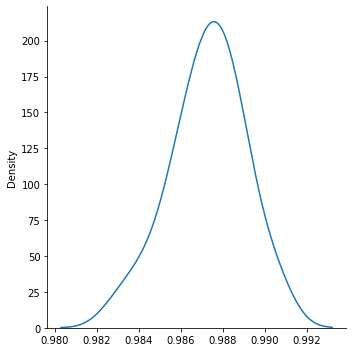

In [ ]:
sns.displot(resultados_arvore,kind='kde');

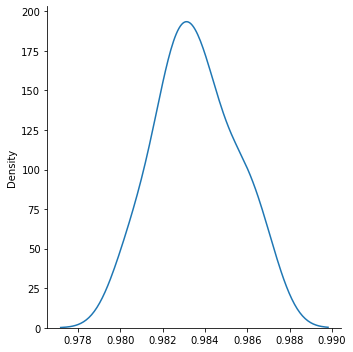

In [ ]:
sns.displot(resultados_random_forest,kind='kde');

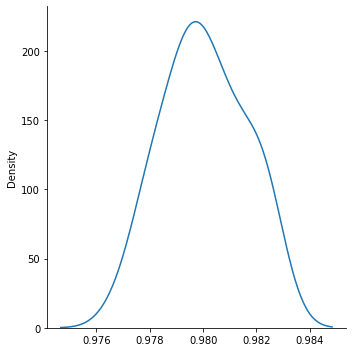

In [ ]:
sns.displot(resultados_knn,kind='kde');

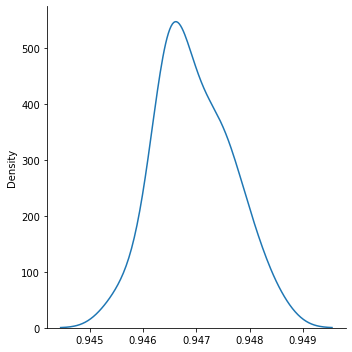

In [ ]:
sns.displot(resultados_logistica,kind='kde'); 

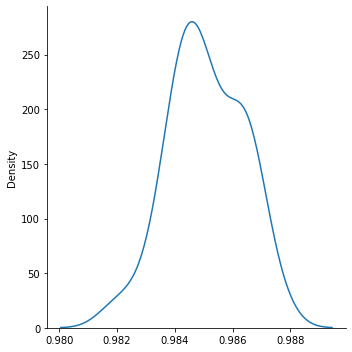

In [ ]:
sns.displot(resultados_svm,kind='kde'); 

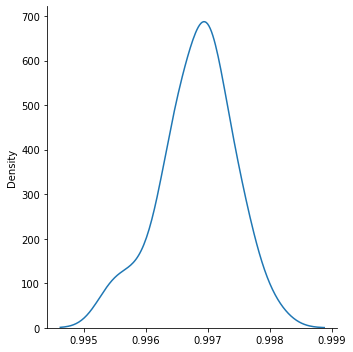

In [ ]:
sns.displot(resultados_rede_neural,kind='kde'); 

####Teste de hipóteses com ANOVA e Tukey

In [ ]:
from scipy.stats import f_oneway

In [ ]:
_,p=f_oneway(resultados_arvore,resultados_random_forest,resultados_knn,resultados_logistica,resultados_svm,resultados_rede_neural)

In [ ]:
alpha=0.05
if p <=alpha:
  print('Hipotese nula rejeitada. Dados são diferentes!')
else:
  print('Hipotese alternativa rejeitada. Resultados são iguais')

Hipotese nula rejeitada. Dados são diferentes!


In [ ]:
resultados_algoritmo={'accuracy':np.concatenate([resultados_arvore,resultados_random_forest,resultados_knn,resultados_logistica,resultados_svm,resultados_rede_neural]),
                      'algoritmo': ['arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore',
                                    'random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest',
                                    'knn','knn','knn','knn','knn','knn','knn','knn','knn','knn', 'knn','knn','knn','knn','knn','knn','knn','knn','knn','knn', 'knn','knn','knn','knn','knn','knn','knn','knn','knn','knn',
                                    'logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica', 'logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica', 'logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica',
                                    'svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm',
                                    'rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural',]}

In [ ]:
resultados_df= pd.DataFrame(resultados_algoritmo)
resultados_df

,accuracy,algoritmo
0,0.9865,arvore
1,0.9845,arvore
2,0.9905,arvore
3,0.9875,arvore
4,0.9890,arvore
...,...,...
175,0.9970,rede_neural
176,0.9960,rede_neural
177,0.9965,rede_neural
178,0.9970,rede_neural


In [ ]:
from statsmodels.stats.multicomp import MultiComparison

In [ ]:
compara_algoritmo=MultiComparison(resultados_df['accuracy'],resultados_df['algoritmo'])

In [ ]:
teste_estatistico=compara_algoritmo.tukeyhsd()
print(teste_estatistico)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2    meandiff p-adj  lower   upper  reject
-----------------------------------------------------------------
       arvore           knn  -0.0072 0.001 -0.0083 -0.0062   True
       arvore     logistica  -0.0403 0.001 -0.0414 -0.0393   True
       arvore random_forest  -0.0037 0.001 -0.0048 -0.0027   True
       arvore   rede_neural   0.0095 0.001  0.0085  0.0106   True
       arvore           svm  -0.0022 0.001 -0.0032 -0.0012   True
          knn     logistica  -0.0331 0.001 -0.0341 -0.0321   True
          knn random_forest   0.0035 0.001  0.0025  0.0045   True
          knn   rede_neural   0.0168 0.001  0.0157  0.0178   True
          knn           svm    0.005 0.001   0.004  0.0061   True
    logistica random_forest   0.0366 0.001  0.0356  0.0376   True
    logistica   rede_neural   0.0499 0.001  0.0488  0.0509   True
    logistica           svm   0.0381 0.001  0.0371  0.0392   True
random_for

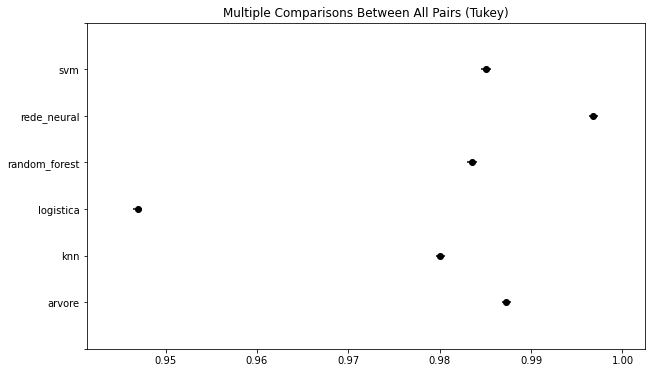

In [ ]:
teste_estatistico.plot_simultaneous();

##Salvar um classificador já treinado

In [ ]:
classificador_rede_neural=MLPClassifier(activation='relu',batch_size=56,solver='adam')
classificador_rede_neural.fit(X_credit,y_credit)

In [ ]:
 classificador_arvore= DecisionTreeClassifier(criterion='entropy',min_samples_leaf=1,min_samples_split=5,splitter='best')
 classificador_arvore.fit(X_credit,y_credit)

In [ ]:
classificador_svm=SVC(C=2.0,kernel='rbf',probability=True)
classificador_svm.fit(X_credit,y_credit)

SVC(C=2.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
pickle.dump(classificador_rede_neural,open('rede_neural_finalizado.sav','wb'))
pickle.dump(classificador_arvore,open('arvore_finalizado.sav','wb'))
pickle.dump(classificador_svm,open('svm_finalizado.sav','wb'))

##Carregar um classificador já treinado

In [ ]:
rede_neural=pickle.load(open('rede_neural_finalizado.sav','rb'))
arvore=pickle.load(open('arvore_finalizado.sav','rb'))
svm=pickle.load(open('svm_finalizado.sav','rb'))